In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-books-reviews/books_data.csv
/kaggle/input/amazon-books-reviews/Books_rating.csv


In [ ]:
rating = pd.read_csv("/kaggle/input/amazon-books-reviews/Books_rating.csv")
books = pd.read_csv("/kaggle/input/amazon-books-reviews/books_data.csv")

In [ ]:
books[['Title', 'ratingsCount']].merge(
    rating.groupby('Title')['review/score'].count().to_frame('review_count'),
    left_on='Title',
    right_index=True
).dropna()

,Title,ratingsCount,review_count
5,The Church of Christ: A Biblical Ecclesiology ...,5.0,4
7,A Walk in the Woods: a Play in Two Acts,3.0,3
31,Voices from the Farm: Adventures in Community ...,1.0,11
33,The Battleship Bismarck,1.0,2
35,Mini-mysteries,1.0,2
...,...,...,...
212374,Thin Within,9.0,15
212392,The Awakening and Selected Stories (Modern Lib...,2.0,7
212394,Final things,4.0,1
212399,The Orphan Of Ellis Island (Time Travel Advent...,2.0,28


[None,
 Text(0, 0.5, 'Log Frequency'),
 Text(0.5, 0, 'Number of ratings in ratings dataset'),
 Text(0.5, 1.0, 'Histogram of number of ratings in the ratings\ndataset for books that are missing ratingsCount value')]

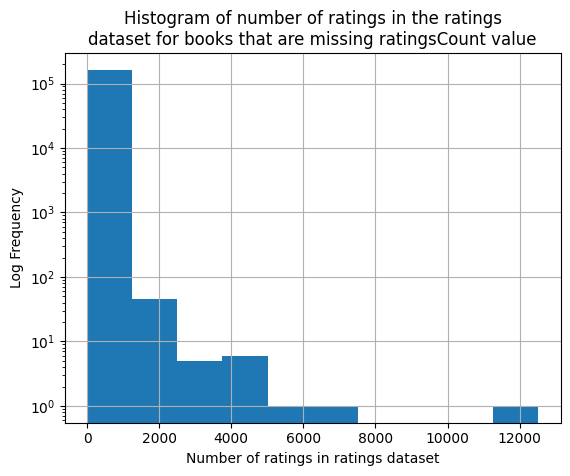

In [ ]:
no_ratings_count = books.loc[books['ratingsCount'].isna(), ['Title', 'ratingsCount']].dropna(subset=['Title'])
no_ratings_count = no_ratings_count.merge(
    rating.groupby('Title')['review/score'].count().to_frame('score_count'),
    left_on='Title',
    right_index=True
)
ax = no_ratings_count['score_count'].hist()
ax.set(
    yscale='log',
    ylabel='Log Frequency',
    xlabel='Number of ratings in ratings dataset',
    title='Histogram of number of ratings in the ratings\ndataset for books that are missing ratingsCount value')

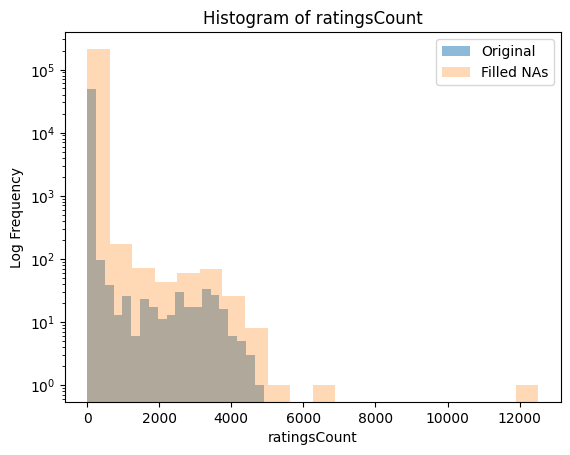

In [ ]:
ax = books['ratingsCount'].plot.hist(label='Original', alpha=0.5, bins=20)
ax.set_title('Histogram of ratingsCount')

ratings_count_filled = books[['Title', 'ratingsCount']].merge(
    no_ratings_count,
    on='Title',
    how='outer'
)

ratings_count_filled['ratingsCount_filled'] = ratings_count_filled.apply(
    lambda x: x['ratingsCount_x'] if not pd.isna(x['ratingsCount_x']) else x['score_count'],
    axis=1,
    raw=False
)

ratings_count_filled['ratingsCount_filled'].plot.hist(label='Filled NAs', ax=ax, alpha=0.3, bins=20)
ax.set(yscale='log', ylabel='Log Frequency', xlabel='ratingsCount')
ax.legend()

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Count of Top 25 Genres')]

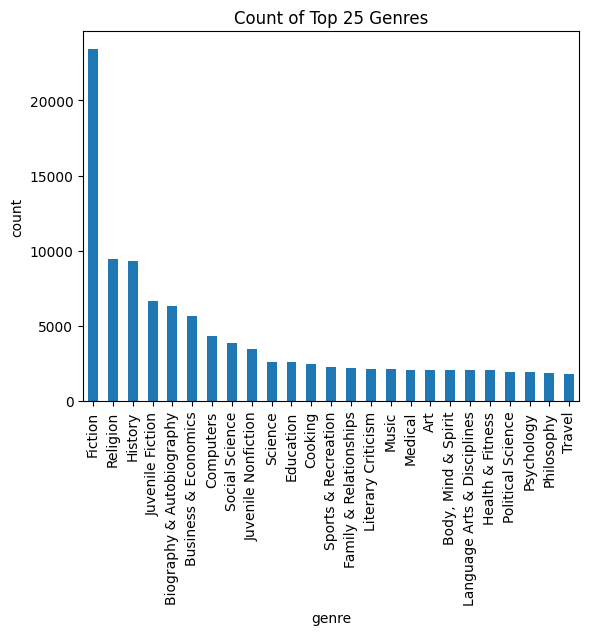

In [ ]:
books['genre'] = books['categories'].str[2:-2]
genre_count = books['genre'].dropna().value_counts().sort_values(ascending=False)
genre_total = genre_count.sum()
ax = genre_count.iloc[:25].plot.bar()
ax.set(ylabel='count', title=f'Count of Top 25 Genres')

In [ ]:
books.columns

Index(['Title', 'description', 'authors', 'image', 'previewLink', 'publisher',
       'publishedDate', 'infoLink', 'categories', 'ratingsCount', 'genre'],
      dtype='object')

In [ ]:
books.authors

0                                lie Stra
1                                  ilip N
2                                vid R. R
3                             ronica Hadd
4                                 ward Lo
                       ...               
212399                        vira Woodru
212400                                NaN
212401                      ld Wild Cabba
212402                            die Smi
212403    vid B. Johnson', 'Thomas A. Mow
Name: authors, Length: 212404, dtype: object

In [ ]:
books.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,genre,authors_clean
0,Its Only Art If Its Well Hung!,NaN,lie Stra,http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN,Comics & Graphic Novels,e St
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,ilip N,http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,Biography & Autobiography,ip
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,vid R. R,http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN,Religion,d R.
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,ronica Hadd,http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN,Fiction,nica Ha
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,ward Lo,NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN,NaN,rd


[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Count of Top 25 Authors')]

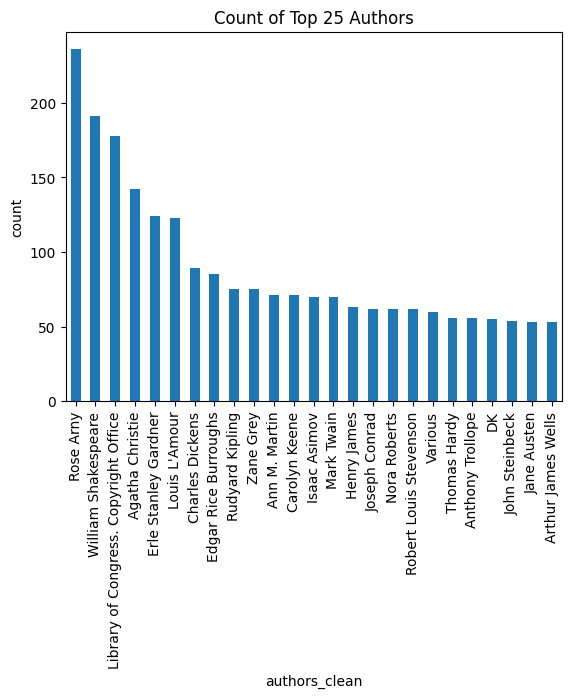

In [ ]:
books['authors_clean'] = books['authors'].str[2:-2]
author_count = books['authors_clean'].dropna().value_counts().sort_values(ascending=False)
author_total = author_count.sum()
ax = author_count.iloc[:25].plot.bar()
ax.set(ylabel='count', title=f'Count of Top 25 Authors')

In [ ]:
def clean_helpfulness(x):
    if pd.isna(x):
        return np.nan
    n = x.split('/')
    try:
        return int(n[0]) / int(n[1])
    except ZeroDivisionError:
        return np.nan
rating['review/helpfulness_clean'] = rating['review/helpfulness'].map(clean_helpfulness)

<Axes: >

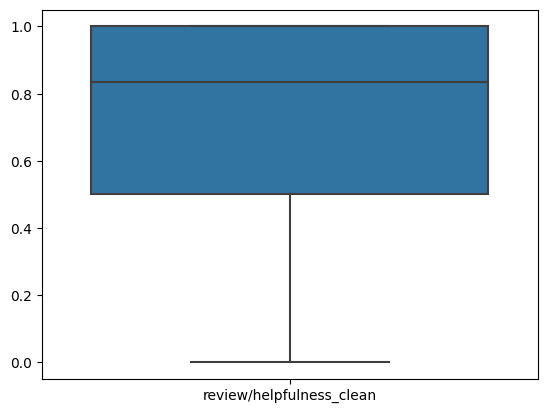

In [ ]:
import seaborn as sns
sns.boxplot(rating[['review/helpfulness_clean']].clip(lower=0, upper=1))

<Axes: >

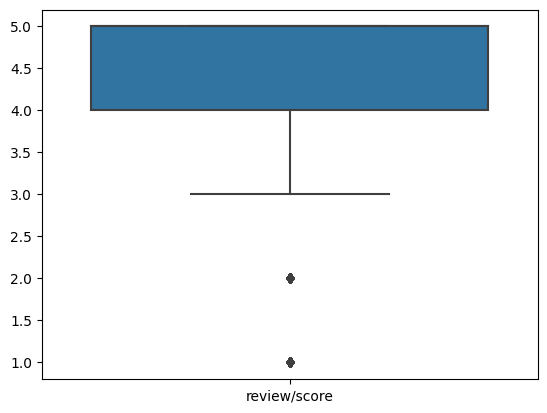

In [ ]:
sns.boxplot(rating[['review/score']])